## Import required packages

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

### Load MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
x, y = mnist.data[:5000], mnist.target[:5000]
print(x.shape)
print(y.shape)

(5000, 784)
(5000,)


### Visualizing a digit

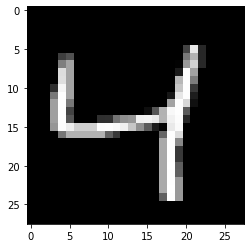

4


In [5]:
digit=x[2]
digit_target=y[2]

digit_img=digit.reshape(28,28)

plt.imshow(digit_img,cmap='gray')
plt.show()
print(digit_target)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(set(y_train))

(4000, 784)
(1000, 784)
(4000,)
(1000,)
{'0', '8', '5', '4', '6', '7', '9', '3', '2', '1'}


In [8]:
y_train = y_train.astype(np.int8)
y_train = (y_train==2)

y_test = y_test.astype(np.int8)
y_test = (y_test==2)

### Scale data using Standard Scaler

In [9]:
scaler = StandardScaler()

In [10]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Initialize Logistic Regression model

In [11]:
model = LogisticRegression(solver='lbfgs', tol=0.1, max_iter=180)

In [12]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=180, tol=0.1)

In [13]:
model.predict([digit])

array([ True])

#### Cross-validation

In [14]:
a = cross_val_score(model, x_train, y_train, cv=3, scoring="accuracy")

In [15]:
print(a)
print(a.mean())

[0.96476762 0.963991   0.96249062]
0.9637497455323351


In [16]:
y_pred = cross_val_predict(model,x_train, y_train, cv=3)

In [17]:
y_pred

array([False, False, False, ..., False, False, False])

### Confusion matrix

In [18]:
confusion_matrix(y_train,y_pred)

array([[3544,   60],
       [  85,  311]], dtype=int64)

### Precision & Recall

In [19]:
precision_score(y_train,y_pred,average='micro')

0.96375

In [20]:
recall_score(y_train,y_pred,average='micro')

0.96375

### F1-score

In [21]:
f1_score(y_train,y_pred,average='micro')

0.96375

### Precision Recall Curve

In [22]:
from sklearn.metrics import precision_recall_curve

In [23]:
y_pred_score=cross_val_predict(model,x_train,y_train,cv=3,method='decision_function')

In [24]:
y_pred_score

array([-11.18607347, -19.9569414 ,  -8.55862324, ..., -13.51628926,
       -27.68943774, -27.54203055])

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_score)

In [26]:
precisions

array([0.12143514, 0.12116564, 0.12120282, ..., 1.        , 1.        ,
       1.        ])

In [27]:
recalls

array([1.        , 0.99747475, 0.99747475, ..., 0.00505051, 0.00252525,
       0.        ])

In [28]:
thresholds

array([-19.91377918, -19.90822787, -19.9050619 , ...,  27.34046735,
        27.49795174,  37.67185951])

### Ploting the Precision Recall Curve

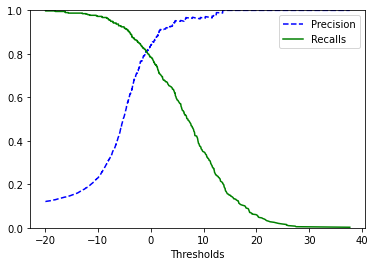

In [29]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")
plt.xlabel("Thresholds")
plt.legend(loc="upper right")
plt.ylim([0,1])
plt.show()